In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [5]:
train_imgs = np.load('./comp0090/fashion-train-imgs.npz')     # 28, 28, 120000
train_label = np.load('./comp0090/fashion-train-labels.npz')   # 12000, 
dev_imgs = np.load('./comp0090/fashion-dev-imgs.npz')          # 28, 28, 1000
dev_label = np.load('./comp0090/fashion-dev-labels.npz')       # 1000,
test_imgs = np.load('./comp0090/fashion-test-imgs.npz')        # 28, 28, 1000
test_label = np.load('./comp0090/fashion-test-labels.npz')     # 1000, 

print(train_imgs.shape)
print(train_label.shape)
print(dev_imgs.shape)
print(dev_label.shape)
print(test_imgs.shape)
print(test_label.shape)

(28, 28, 12000)
(12000,)
(28, 28, 1000)
(1000,)
(28, 28, 1000)
(1000,)


[  562  8674  5105  7083  5559  8182   846 11248  2440  8573  2295  8464
  2840 10881  3431  7715  1584  5593  7179  3823  9699  5048  4376  6840
  1601]
(25, 784)


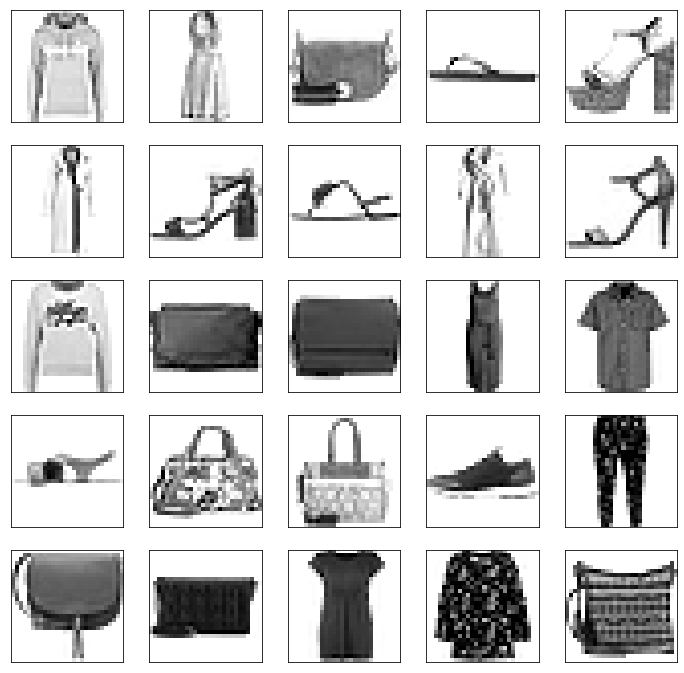

In [6]:
train_imgs_data = np.zeros((train_imgs.shape[2],train_imgs.shape[1]*train_imgs.shape[0]))
for k in range(train_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     train_imgs_data[k][index] = train_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(train_imgs_data.shape[0]), 25)
sample_images = train_imgs_data[sample_idx, :]
print(sample_idx)
print(sample_images.shape)
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

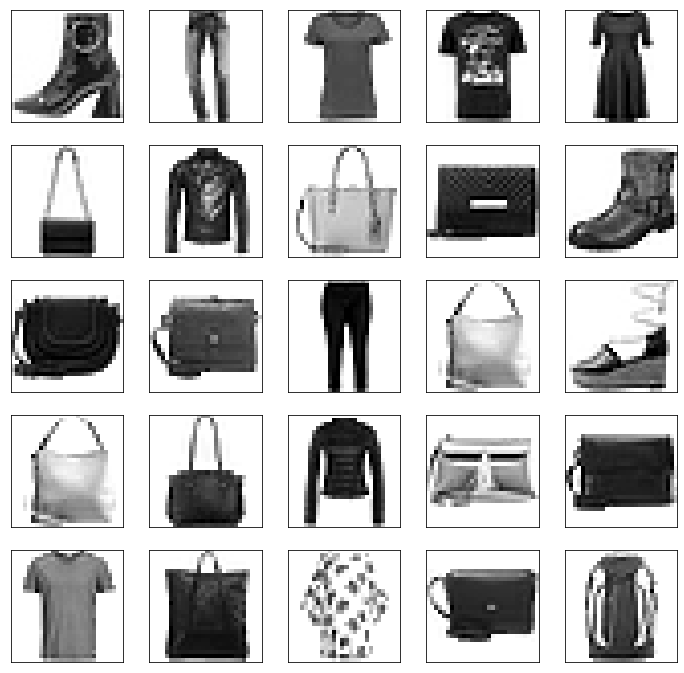

In [7]:
dev_imgs_data = np.zeros((dev_imgs.shape[2],dev_imgs.shape[1]*dev_imgs.shape[0]))
for k in range(dev_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     dev_imgs_data[k][index] = dev_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(dev_imgs_data.shape[0]), 25)
sample_images = dev_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

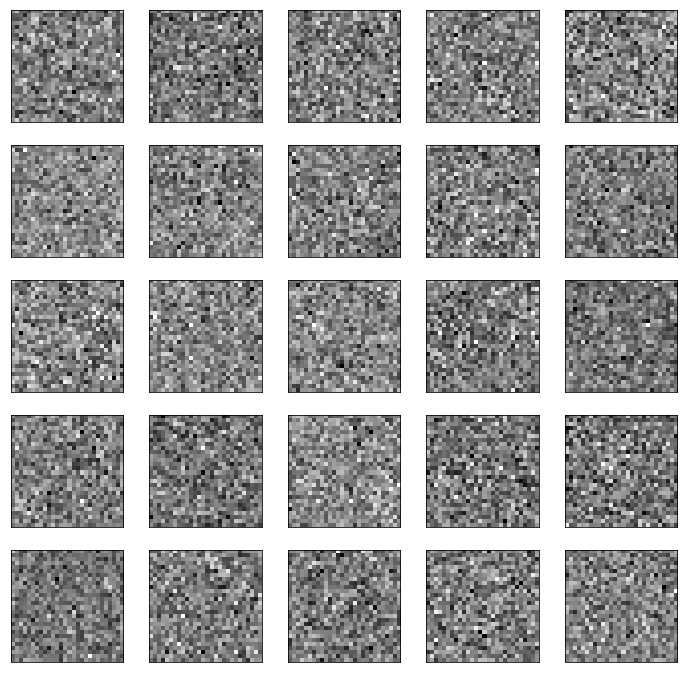

In [8]:
test_imgs_data = np.zeros((test_imgs.shape[2],test_imgs.shape[1]*test_imgs.shape[0]))
for k in range(test_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     test_imgs_data[k][index] = test_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(test_imgs_data.shape[0]), 25)
sample_images = test_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [9]:
def Training_perceptron(train_imgs, train_label):
    epoch_e = 0
    d = 28*28  # number of pixels
    w = np.zeros(d)       
    b = 0
    c = 0
    k = 1
    predict_list = [] 
    
    for i in np.arange(round(len(train_label))): #Calculate perceptron result
        x = np.concatenate(train_imgs[:, :, i])
        y_hat = w@x + b

        if y_hat >= 0:    
            y_hat = 1
        else:
            y_hat = 0

            
        if y_hat == train_label[i] :  # train = prediction -> c +
            c += 1
        else:                         # train != prediction -> reset c = 1 and k + 1
            epoch_e += 1 
            w += (train_label[i] - y_hat) * x
            c = 1
            k += 1  
        
        predict_list.append(y_hat)
        
    accuracy = (len(train_label) - epoch_e) / (len(train_label))

    return accuracy, w, predict_list

def Prediction_perceptron(dev_imgs, dev_label, w):
    epoch_e = 0
    d = 28 * 28  
    b = 0
    c = 0
    k = 1
    predict_list = [] 
    
    for i in np.arange(round(len(dev_label))): #Calculate perceptron result
        x = np.concatenate(dev_imgs[:, :, i])
        predict = np.dot(x,w)
        
        if predict >= 0:    #Binarize success/failure
            predict = 1
        else:
            predict = 0
    
        predict_list.append(predict)
        
    return predict_list

In [10]:
# Provide that the efficient conversion is functionally equivalent to the above algorithm of the training set.
training_accuracy, weight, predict_train = Training_perceptron(train_imgs, train_label)
print('Train Acc : ',training_accuracy)
print(classification_report(train_label, predict_train))

Train Acc :  0.9293333333333333
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6000
           1       0.92      0.94      0.93      6000

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



In [11]:
# Provide that the efficient conversion is functionally equivalent to the above algorithm of the prediction set.
predict = Prediction_perceptron(dev_imgs, dev_label, weight)
prediction_accuracy = accuracy_score(dev_label,predict)
print('Test Acc : ',prediction_accuracy)
print(classification_report(dev_label, predict))

Test Acc :  0.967
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       495
           1       0.95      0.99      0.97       505

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [12]:
def Training_perceptron_epoch(train_imgs, train_label, w):
    epoch_e = 0
    b = 0
    c = 0
    k = 1
    predict_list = [] 
    
    for i in np.arange(round(len(train_label))): #Calculate perceptron result
        x = np.concatenate(train_imgs[:, :, i])
        y_hat = w@x + b

        if y_hat >= 0:    
            y_hat = 1
        else:
            y_hat = 0

            
        if y_hat == train_label[i] :  # train = prediction -> c +
            c += 1
        else:                         # train != prediction -> reset c = 1 and k + 1
            epoch_e += 1 
            w += (train_label[i] - y_hat) * x
            c = 1
            k += 1  
        
        predict_list.append(y_hat)
        
    accuracy = (len(train_label) - epoch_e) / (len(train_label))

    return accuracy, w, predict_list

def Prediction_perceptron_epcho(dev_imgs, dev_label, w):
    b = 0
    c = 0
    k = 1
    predict_list = [] 
    
    for i in np.arange(round(len(dev_label))): 
        x = np.concatenate(dev_imgs[:, :, i])
        predict = np.dot(x,w)
        
        if predict >= 0:    
            predict = 1
        else:
            predict = 0
                 
        predict_list.append(predict)
        
    return predict_list

In [13]:
# Train the model to converge on the training set.
prediction_accuracy = 0
epoch = [0]
training_epoch_accuracy = [0]
prediction_epoch_accuracy = [0]
w = np.zeros(28*28) 

while len(epoch) <= 500:
    training_accuracy, w, predict_train = Training_perceptron_epoch(train_imgs, train_label, w)   
    prediction_test = Prediction_perceptron_epcho(dev_imgs, dev_label,w)
    prediction_accuracy = accuracy_score(dev_label,prediction_test)
    
    training_epoch_accuracy.append(training_accuracy)   
    prediction_epoch_accuracy.append(prediction_accuracy)
    epoch.append(1 + epoch[-1])

training_epoch_accuracy.remove(0)
prediction_epoch_accuracy.remove(0)
epoch.remove(0)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

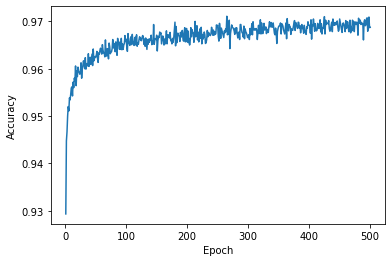

In [16]:
# Provide an accuracy plot of the train set for each generation.
f1 = sns.lineplot(x = epoch, y = training_epoch_accuracy)
f1.set(xlabel = 'Epoch', ylabel = 'Accuracy')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

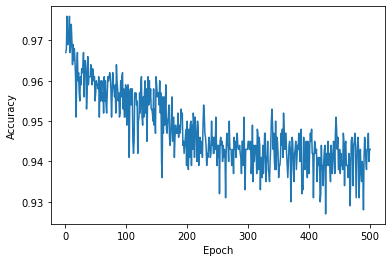

In [17]:
# Provide an accuracy plot of the Test set for each generation.
f2 = sns.lineplot(x = epoch, y = prediction_epoch_accuracy)
f2.set(xlabel = 'Epoch', ylabel = 'Accuracy')

**Answer:** Figures show that the accuracy of the training set is increased when the number of training time is larger. Thus, it means that training accuracy can be more accurate when the number of epoch is as large as possible. The highest accuracy of the validation set is 97.6% when the epoch is third. Therefore, the accuracy of the training set when the epoch is third, is 94.7%. The plot of accuracy for the validation set is shown. When the outputs of the efficient variant algorithm compare with the voted perceptron algorithm, the efficient variant algorithm can demonstrate that it is more precise than the original voted perceptron algorithm.

Output:

Training and test accuracy with voted percpetron algorithm is 92.93% and 96.9%

Training and test accuracy with efficient variant algorithm is 94.7% and 97.6%